# Geometric Brownian Motion

In [1]:
using KadanoffBaym
# using LinearAlgebra
using PyPlot
using PyCall
qt = pyimport("qutip")
np = pyimport("numpy")

font_size = 16
# font_size = 20

PyPlot.matplotlib.rc("text", usetex=true)
PyPlot.matplotlib.rc("font", family="serif", size=font_size)
PyPlot.matplotlib.rc("axes", labelsize=font_size)
PyPlot.matplotlib.rc("xtick.major", size=8)
PyPlot.matplotlib.rc("ytick.major", size=8)
PyPlot.matplotlib.rc("xtick.minor", visible=true, size=4)
PyPlot.matplotlib.rc("ytick.minor", visible=true, size=4)
PyPlot.matplotlib.rc("xtick", top=true, direction="inout")
PyPlot.matplotlib.rc("ytick", right=true, direction="inout")

## KadanoffBaym.jl

In [2]:
S_bar = [zeros(Float64, 1) for _ in 1:3];
Fs = [zeros(Float64, 1) for _ in 1:3];
F_anas = [zeros(Float64, 1) for _ in 1:3];
solts = [zeros(Float64, 1) for _ in 1:3];

In [3]:
idx = 1;

In [4]:
idx = 2;

In [5]:
idx = 3;

In [6]:
T = 1.0
mu = 1.

sigmas = [1., .5, .1];
sigma = sigmas[idx]

S_0s = [1., 2., 5.]
S_0 = S_0s[idx]

S = GreenFunction(reshape(Float64[S_0], 1, 1), KadanoffBaym.Classical)
F = GreenFunction(reshape(Float64[0.], 1, 1), KadanoffBaym.Classical)

f_vert(_, _, t1, t2) = [0., mu * F[t1, t2]]
f_diag(_, times, t)  = [mu * S[t, t], 2mu * F[t, t] + sigma^2 * (S[t, t]^2 + F[t, t])]

F_ana = (t, t′) -> S_0^2 * exp(mu * (t + t′)) * (exp(sigma^2 * min(t, t′)) - 1);

In [7]:
sol = kbsolve(f_vert, f_diag, [S, F], (0.0, T), dtini=1e-15, atol=1e-8, rtol=1e-6)#, dtmax=2^-8);

In [8]:
t_scale = abs(mu)
n = length(sol.t) - 1

166

## Plotting

In [9]:
cmap = "gist_heat";
colors = ["C0", "C1", "C2"];
lss = ["-", "--", "-."];

In [10]:
S_bar[idx] = [S.data[k, k] for k in 1:n+1]
Fs[idx] = [F.data[k, k] for k in 1:n+1]
F_anas[idx] = F_ana.(sol.t, sol.t);
solts[idx] = sol.t;

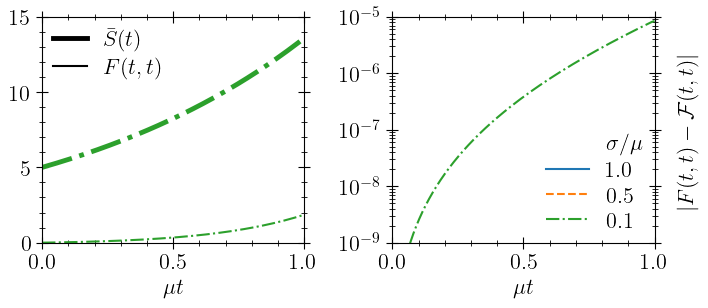

In [14]:
figure(figsize=(7, 3))

ax = subplot(121)
for (k, F) in enumerate(Fs)
    if k == 1
        plot(solts[k], S_bar[k], label="\$\\bar{S}(t)\$", lw=3.5, c=colors[k], ls=lss[k])
        plot(solts[k], F, "-", label="\$F(t, t)\$", lw=1.5, c=colors[k], ls=lss[k])
    else
        plot(solts[k], F, lw=1.5, c=colors[k], ls=lss[k])
        plot(solts[k], S_bar[k], lw=3.5, c=colors[k], ls=lss[k])
    end
end
xlim(0, t_scale * T)
ylim(0, 15)
# yticks([0, 1, 2, 3, 4, 5])
xlabel("\$\\mu t\$")
# ylabel("\$F(t, t)\$")
ax.legend(loc="best", handlelength=1.5, frameon=false, borderpad=0, labelspacing=0.25)
leg = ax.get_legend()
leg.legendHandles[1].set_color("k")
leg.legendHandles[2].set_color("k")

ax = subplot(122)
plot([], [], label="\$\\sigma/\\mu\$", c="w")
for (k, F) in enumerate(Fs)
    semilogy(solts[k], abs.(F  .- F_anas[k]), lw=1.5, c=colors[k], label="\$"*string(sigmas[k]/(mu))*"\$", ls=lss[k])
end

xlim(0, t_scale * T)
ylim(1e-9, 1e-5)
# yticks([0, 1, 2, 3, 4, 5])
xlabel("\$\\mu t\$")
ylabel("\$\\left|F(t, t) - \\mathcal{F}(t, t)\\right|\$", labelpad=16)
ax.yaxis.set_label_position("right")
ax.legend(loc="best", handlelength=1.9, frameon=false, borderpad=0, labelspacing=0.25)
# ticklabel_format(axis="y", style="sci", scilimits=(-0, 0))

tight_layout(pad=0.25, w_pad=1, h_pad=0)

# savefig("geometric_brownian_motion_example_T.pdf")

## Testing

In [12]:
Y, X = np.meshgrid(sol.t[1:end], sol.t[1:end]);

In [13]:
figure(figsize=(7, 3))

vmin = 0
vmax = D/(2lambda)
ax = subplot(121) # plt.gca()
heatmap = ax.pcolormesh(t_scale * X, t_scale * Y, (F.data), cmap=cmap, rasterized=true)#, vmin=vmin, vmax=vmax)
heatmap.set_edgecolor("face")
ax.set_aspect("equal")
cbar = colorbar(mappable=heatmap)
cbar.formatter.set_powerlimits((0, 0))
ax.set_xlabel("\$\\lambda t\$")
ax.set_ylabel("\$\\lambda t'\$")
ax.set_xlim(0, t_scale * T)
ax.set_ylim(0, t_scale * T)
ax.set_xticks(t_scale .* [0, T/2, T])
ax.set_yticks(t_scale .* [0, T/2, T])

ax = subplot(122)
heatmap = ax.pcolormesh(t_scale * X, t_scale * Y, (abs.(F.data .- F_ana.(X, Y))), cmap="gist_gray", rasterized=true)#, vmin=1e-9, vmax=1e-6)
# heatmap.set_edgecolor("face")
ax.set_aspect("equal")
cbar = colorbar(mappable=heatmap)
cbar.formatter.set_powerlimits((0, 0))
ax.set_xlabel("\$\\lambda t\$")
# ax.set_ylabel("\$\\lambda t'\$")
ax.set_xlim(0, t_scale * T)
ax.set_ylim(0, t_scale * T)
ax.set_xticks(t_scale .* [0, T/2, T])
ax.set_yticks(t_scale .* [0, T/2, T])
ax.set_yticklabels([])

tight_layout(pad=0.75, w_pad=0.25, h_pad=0)
# savefig("brownian_motion_example_t_tp.pdf")

LoadError: UndefVarError: lambda not defined